In [1]:
# Imports:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

Code for error estimation from Appendix:

In [2]:
# This part is for the error norm between ground truth and
# calcualted result. The function was given in the 
# lab paper in matlab, translated with ChatGPT.
def Errornorm(u_e, u_h):
    n = len(u_h)
    h = 1.0 / (n - 1) 
    
    t = np.array([(1 - np.sqrt(3 / 5)) / 2, 1 / 2, (1 + np.sqrt(3 / 5)) / 2])
    w = np.array([5 / 18, 8 / 18, 5 / 18])
    e2 = 0

    for i in range(n - 1):  
        v_e = u_e((i) * h + h * t)  
        v_h = (1 - t) * u_h[i] + t * u_h[i + 1] 
        e2 += np.sum((v_e - v_h) ** 2 * w)

    e = np.sqrt(h * np.abs(e2))
    return e


In [3]:
# Test function for c for exercise 1
def Test_c(x):
    return 1

In [4]:
# Ground truth for u(x):
def u(x):
    return -x**3+3*x

Exercise 1

In [5]:
# Exercise 1/a)
def StiffnessMatrix(N,c):
    A_matrix = np.zeros((N+1, N+1))
    h = 1/N
    xi = 0
    xi_next = h

    A_matrix[0][0] = (c(xi) + c(xi_next))/(2*h)
    A_matrix[0][1] = -(c(xi) + c(xi_next))/(2*h) 
    
    for i in range(1,N):
        xi_prev = xi
        xi = xi_next
        xi_next += h
        
        A_matrix[i][i-1] = -(c(xi_prev) + c(xi))/(2*h)
        A_matrix[i][i] = (c(xi_prev) + 2*c(xi)+ c(xi_next))/(2*h)
        A_matrix[i][i+1] = -(c(xi) + c(xi_next))/(2*h)

    A_matrix[-1][-2] = -(c(1-h) + c(h))/(2*h)
    A_matrix[-1][-1] = (c(1-h) + c(h))/(2*h)
    
    return A_matrix


In [6]:
# Results of exercise 1/a) for n=4
# The results seem ok for integral of a constant c.
n = 4
N = n-1

A = StiffnessMatrix(N,Test_c)
print(tabulate(A, tablefmt="grid"))

+----+----+----+----+
|  3 | -3 |  0 |  0 |
+----+----+----+----+
| -3 |  6 | -3 |  0 |
+----+----+----+----+
|  0 | -3 |  6 | -3 |
+----+----+----+----+
|  0 |  0 | -3 |  3 |
+----+----+----+----+


Exercise 1/b)

In [7]:
# 'f' right handside function.
def f(x):
    return 6*x

In [8]:
# Exercise 1/b) qb preset for 0.
def LoadVector(N, f,qb=0):
    b_vector = np.zeros(N+1)
    h = 1/N
    xi = 0
    
    b_vector[0] = h/2*f(xi)

    for i in range(1,N):
        xi += h
        b_vector[i] = h*f(xi)

    b_vector[-1] = h/2*f(xi+h) + qb

    return b_vector


In [9]:
# Load vector result stored in 'b' for n = 4
n = 4
N = n-1
b = LoadVector(N,f)


Exercise 1/c)

In [10]:
# Boundary conditions for Dirichlet and Neumann with error handle.
def ApplyBCs(A, b, l_t, l_v, r_t, r_v):
    A_return = A
    b_return = b
    n = np.size(b)
    

    if l_t == 'Dirichlet':
        A_return[0][0] = 1
        A_return[0][1] = 0
        b_return[0] = l_v

    elif l_t == 'Neumann':
        b_return[0] += l_v
        
    else:
        raise ValueError("Not valid input for l_t.")

    if r_t == 'Dirichlet':
        A_return[-1][-1] = 1
        A_return[-1][-2] = 0
        b_return[-1] = r_v
        
    elif r_t == 'Neumann':
        b_return[-1] += r_v
        
        
    else:
        raise ValueError("Not valid input for r_t.")

    return A_return, b_return
    


In [11]:
l_t = 'Dirichlet'
l_v = 0
r_t = 'Neumann'
r_v = 0

A_modified,b_modified = ApplyBCs(A, b, l_t, l_v, r_t, r_v)

In [12]:
# Error of Exercise 1 for n = 4
c = np.linalg.solve(A, b)
print('Errornorm:')
print(Errornorm(u,c))


Errornorm:
0.03595645896101417


Exercise 1/d)

In [13]:
# This function is for plotting both the ground truth
# and the calculated results.
def compare(a,b,n,gt,func):
    # This part is for the ground truth:
    x = np.linspace(a,b,n)
    y = [gt(a) for a in x]
    
    
    plt.plot(x, y, label='Ground Truth')
    plt.plot(x, func, label='Calculated')
    
    plt.legend()

    plt.show()
    

Errornorm:
0.001406783487435118


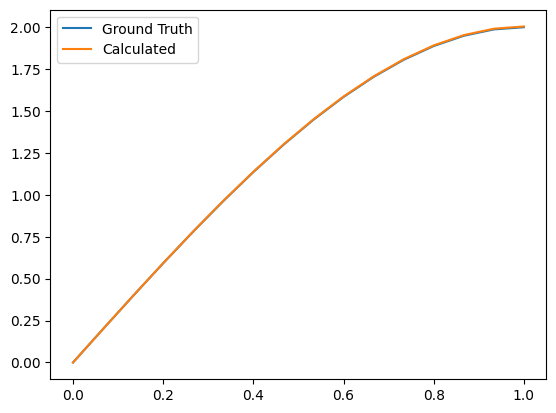

In [14]:
# Here are the results of Exercise 1/d)
n = 16
N = n-1

A = StiffnessMatrix(N,Test_c)
b = LoadVector(N,f)

l_t = 'Dirichlet'
l_v = 0
r_t = 'Neumann'
r_v = 0

A_modified,b_modified = ApplyBCs(A, b, l_t, l_v, r_t, r_v)

# Estimated error:
c = np.linalg.solve(A_modified, b_modified)
print('Errornorm:')
print(Errornorm(u,c))

# Calling a function plotting both the exact solution and the calculated one:
compare(0,1,n,u,c)



Exercise 1/e)

In [15]:
# Here I calculate the error between ground truth and
# calculated u_2h for the corresponding N. Than I calculate
# 2*N for the current N and the result u_h. I check between
# these for the error, that is why from the result Table 1
# I am missing the n/a. Error rate converges to 2.

N = [4,8,16,32,64]

l_t = 'Dirichlet'
l_v = 0
r_t = 'Neumann'
r_v = 0

rates = np.zeros(len(N))
errors = np.zeros(len(N))

for i in range(0,len(N)):
    A = StiffnessMatrix(N[i],Test_c)
    b = LoadVector(N[i],f)
    A_modified,b_modified = ApplyBCs(A, b, l_t, l_v, r_t, r_v)
    u_2h = np.linalg.solve(A_modified, b_modified)

    A_next = StiffnessMatrix(2*N[i],Test_c)
    b_next = LoadVector(2*N[i],f)
    A_modified_next,b_modified_next = ApplyBCs(A_next, b_next, l_t, l_v, r_t, r_v)
    u_h = np.linalg.solve(A_modified_next, b_modified_next)

    dif_h  = Errornorm(u,u_h) 
    dif_2h = Errornorm(u,u_2h)
    
    r = np.log2(dif_2h/dif_h)

    errors[i] = dif_h
    rates[i] = r


Exercise 1/e)

In [16]:
# We can see in this table that indeed we get the second order
print(tabulate([['errors', errors[0], errors[1],errors[2],errors[3],errors[4]], ['rates', rates[0], rates[1],rates[2],rates[3],rates[4]]], headers= ['n-1',N[0], N[1],N[2],N[3],N[4]],tablefmt="grid"))

+--------+------------+------------+------------+------------+-------------+
| n-1    |          4 |          8 |         16 |         32 |          64 |
+========+============+============+============+============+=============+
| errors | 0.00495744 | 0.00123629 | 0.00030888 | 7.7208e-05 | 1.93013e-05 |
+--------+------------+------------+------------+------------+-------------+
| rates  | 2.01414    | 2.00358    | 2.0009     | 2.00022    | 2.00006     |
+--------+------------+------------+------------+------------+-------------+


Exercise 2)

In [17]:
# u(x) for Exercise 2
def u2(x):
    return 2*x - x**2 + np.log(1+x)- np.log(2)

In [18]:
# Right handside for Exercise 2.
def g(x):
    return 4*x 

In [19]:
# c for exercise 2.
def c2(x):
    return 1+x

Errornorm:
0.0016847389577304022


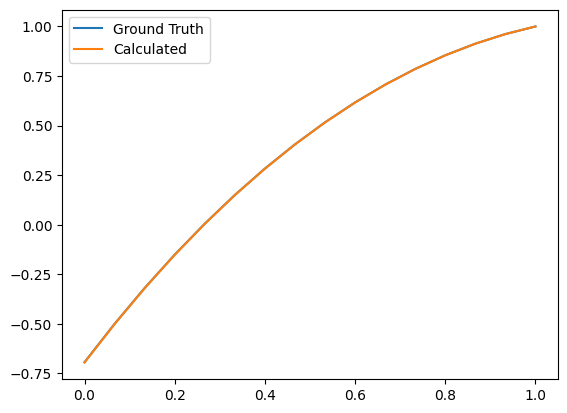

In [20]:
# Results for Exercise 2 for n = 16
n = 16
N = n-1

A = StiffnessMatrix(N,c2)
b = LoadVector(N,g,3)

l_t = 'Neumann'
l_v = -3
r_t = 'Dirichlet'
r_v = 1

A_modified, b_modified = ApplyBCs(A, b, l_t, l_v, r_t, r_v)

cc = np.linalg.solve(A_modified, b_modified)
print('Errornorm:')
print(Errornorm(u2,cc))
compare(0,1,n,u2,cc)


Table simular to Table 1:

In [21]:
N = [4,8,16,32,64]


rates = np.zeros(len(N))
errors = np.zeros(len(N))

for i in range(0,len(N)):
    A = StiffnessMatrix(N[i],c2)
    b = LoadVector(N[i],g,3)
    A_modified,b_modified = ApplyBCs(A, b, l_t, l_v, r_t, r_v)
    u_2h = np.linalg.solve(A_modified, b_modified)

    A_next = StiffnessMatrix(2*N[i],c2)
    b_next = LoadVector(2*N[i],g,3)
    A_modified_next,b_modified_next = ApplyBCs(A_next, b_next, l_t, l_v, r_t, r_v)
    u_h = np.linalg.solve(A_modified_next, b_modified_next)

    dif_2h  = Errornorm(u2,u_2h) 
    
    dif_h = Errornorm(u2,u_h)
    
    r = np.log2(dif_2h/dif_h)

    errors[i] = dif_h
    rates[i] = r

print(tabulate([['errors', errors[0], errors[1],errors[2],errors[3],errors[4]], ['rates', rates[0], rates[1],rates[2],rates[3],rates[4]]], headers= ['n-1',N[0], N[1],N[2],N[3],N[4]],tablefmt="grid"))

+--------+------------+------------+-------------+-------------+-------------+
| n-1    |          4 |          8 |          16 |          32 |          64 |
+========+============+============+=============+=============+=============+
| errors | 0.00592343 | 0.00148072 | 0.000370172 | 9.25424e-05 | 2.31356e-05 |
+--------+------------+------------+-------------+-------------+-------------+
| rates  | 2.00056    | 2.00013    | 2.00003     | 2.00001     | 2           |
+--------+------------+------------+-------------+-------------+-------------+
